# Predicting heart disease using machine learning

This notebook uses Python based machine learning and data science libraries to build a machine learning model capable 
of predicting whether or not someone has heart disease based on their medical attributes.  

## 1. Problem definition

The objective is to predict/classify whether a patient has heart disease or not given his/her clinical parameters. 

## 2. Data 

The original data, the Heart Disease Data Set, comes from the UCI Machine Learning Repository. A version of it can also be found on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci. The data set includes information on 303 patients on 14 features.  

Variables or features explanations:

1. age: age in years
2. sex: 1 = male, 0 = female
3. cp (chest pain type): 0 = typical angina, 1 = atypical angina, 2=non-anginal pain, 3=asymptomatic
4. trestbps (resting blood pressure in mm/hg )
5. chol (serum cholesterol in mg/dl)
6. fps (fasting blood sugar > 120 mg/dl): 0 = no, 1 = yes
7. restecg (resting ECG): 0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina): 1 = yes, 0 = no
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment)
12. ca (number of major vessels (0–3))
13. thal: 1 = normal, 2 = fixed defect, 3 = reversible defect
14. target: 0 = disease, 1 = no disease

## 3. Evaluation

Objective: 95% accuracy of prediction.

## 4. Features

## Preparing the tools 

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [210]:
# import EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 


# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [211]:
df = pd.read_csv("heart-disease.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [212]:
df.shape

(303, 14)

In [213]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

So the variable types are: 
    - Binary: sex, fbs, exang, target
    - Categorical: cp, restecg, slope, ca, thal
    - Continous: age, trestbps, chol, thalach, oldpeak

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleaning

In [215]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [216]:
# It seems we have 5 categories in the data for the variable ca when we should have only 4.
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [217]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [218]:
df[df["ca"]==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [219]:
df.loc[df.ca==4, 'ca'] = np.NaN
df["ca"].unique()

array([ 0.,  2.,  1.,  3., nan])

In [220]:
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

In [221]:
df[df["thal"]==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [222]:
df.loc[df.thal==0, 'thal'] = np.NaN
df["thal"].unique()

array([ 1.,  2.,  3., nan])

In [223]:
# we check for the missing values and replace them by the median
# df.isna().sum()
df = df.fillna(df.median())
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [224]:
# check for duplicated rows
df.duplicated().sum()

1

In [225]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


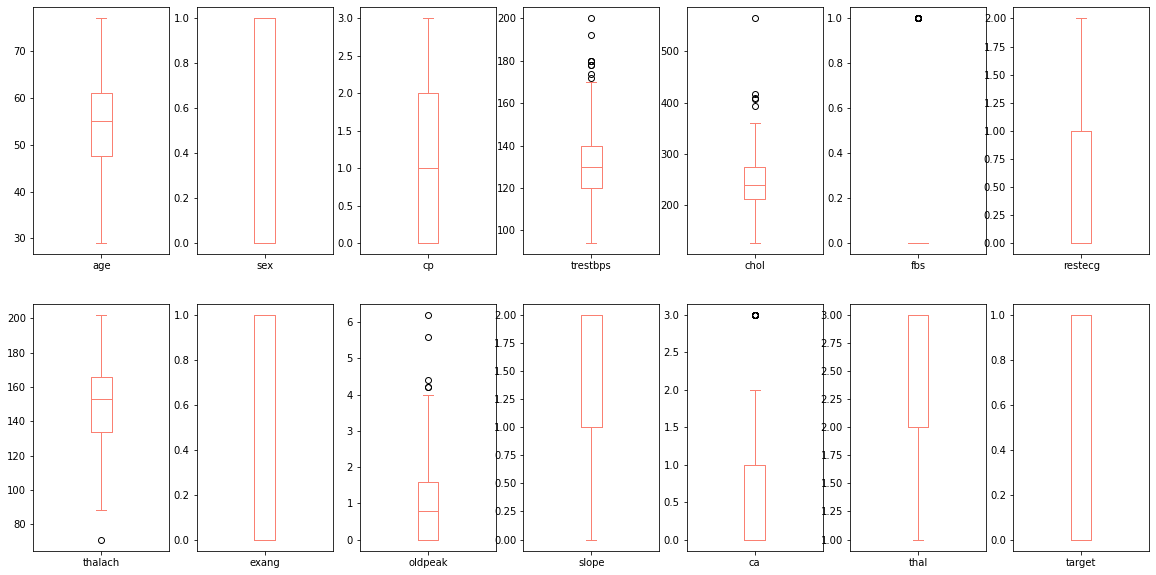

In [226]:
# check for outliers
df.plot(kind = "box",
        subplots = True, 
        layout =(2,7),
        figsize=(20,10),
        color = "salmon");

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

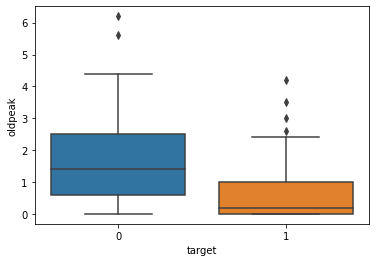

In [227]:
sns.boxplot(x="target", y="oldpeak", data=df)

In [228]:
# remove outliers 
cont_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

## Exploratory data analysis

### target variable distribution

In [229]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

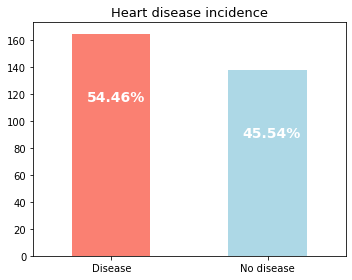

In [230]:
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No disease"]
ax = df["target"].value_counts().plot(kind="bar", color=(["salmon", "lightblue"]))
ax.set_title("Heart disease incidence", fontsize=13)
ax.set_xticklabels(name, rotation=0)

# Calculate percentages
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

We have slightly more sick persons than healty persons in the dataset.

### age distribution

Text(0.5, 1.0, 'Age distribution')

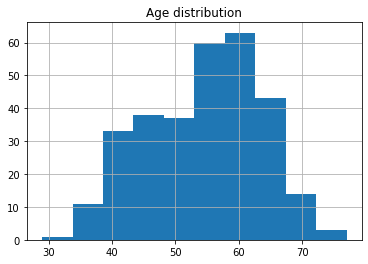

In [231]:
# check the distribution of the age column with a histogram
df.age.hist().plot(kind="bar")
plt.title("Age distribution")

The age is normally distributed.

In [232]:
df.groupby(["target"])[["age"]].describe()

age                                                   
        count       mean       std   min   25%   50%   75%   max
target                                                          
0       138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0
1       165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0

### gender distribution by target variable 

In [233]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [234]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

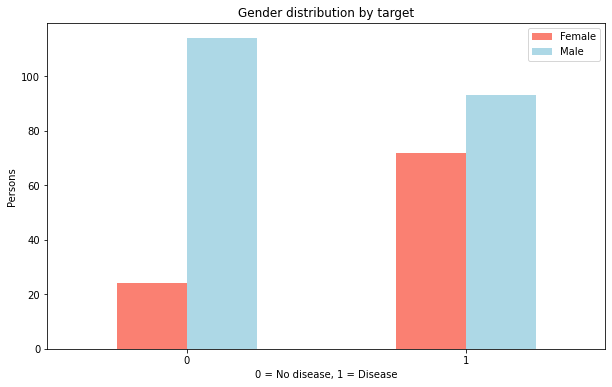

In [235]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color = ["salmon", "lightblue"])
plt.title("Gender distribution by target")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Persons") 
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

### age vs max heart rate for heart disease

In [236]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

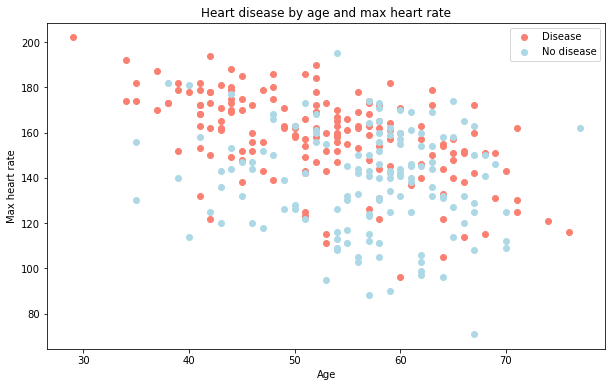

In [237]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart disease by age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No disease"])

In [238]:
# Heart disease frequency by chest pain type
# pd.crosstab(df.cp, df.target).apply(lambda x: x/x.sum(), axis=1)
pd.crosstab(df.cp, df.target, normalize='index')

target,0,1
cp,,
0,0.727273,0.272727
1,0.180000,0.820000
2,0.206897,0.793103
3,0.304348,0.695652


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

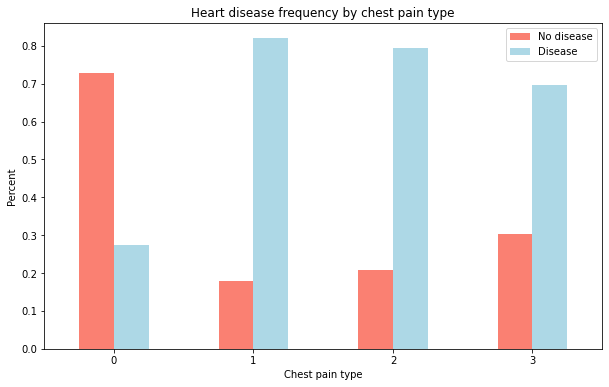

In [239]:
pd.crosstab(df.cp,df.target, normalize='index').plot(kind = "bar",
                                                     figsize = (10,6),
                                                     color = ["salmon", "lightblue"])
plt.title("Heart disease frequency by chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Percent")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0)

(14.5, -0.5)

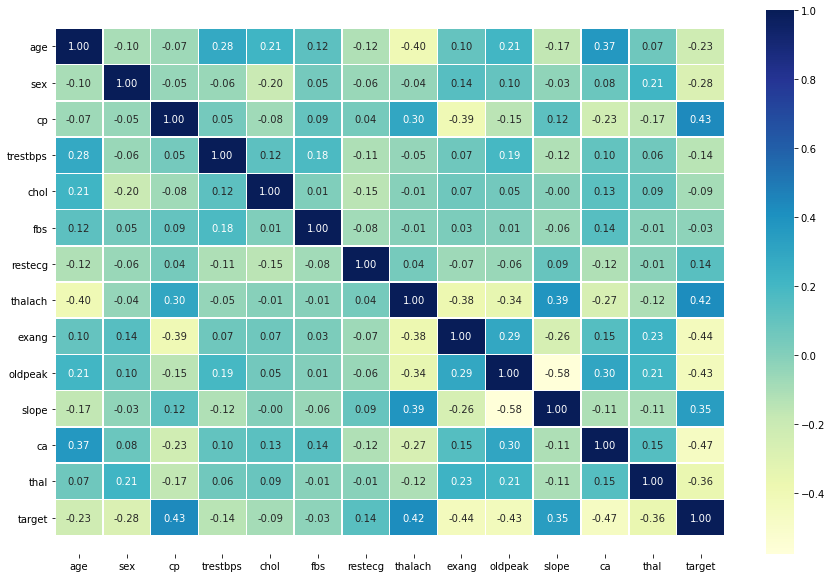

In [240]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths =0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu")
bottom, top =ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [241]:
X = df.drop("target", axis=1)
y = df["target"]

In [242]:
# se random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

I am going to try 3 diffrent machine learning models:
    1. Logistic regression
    2. K-nearest neighbors Classifier 
    3. Random Forest Classifier

In [243]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and sore models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of  different machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels 
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores ={}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [244]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Rodica\miniconda3\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparison

In [245]:
model_compare =pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.852459


<AxesSubplot:>

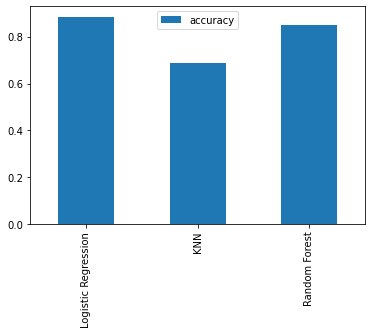

In [246]:
model_compare.T.plot.bar()

We have our baseline models. Next, we are going to check the following:
* Hyperparameter tuning 
* Feature importance
* Confusion matrix 
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning 

In [247]:
# KNN tuning
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# set KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train, y_train)
    # update the training score list
    train_scores.append(knn.score(X_train,y_train))
    # update the test score list
    test_scores.append(knn.score(X_test, y_test))
    

In [248]:
train_scores

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [249]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


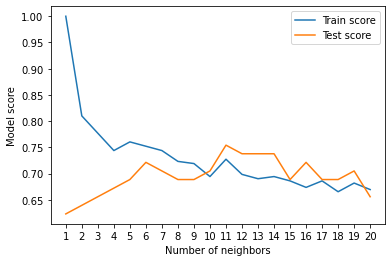

In [250]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

I am going to tune the:
    * LogisticRegression()
    * RandimForestClassifier()
... using RandomizedSearchCV.

In [251]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Tune LogisticRegression()
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for logisticRegression  
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [252]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [253]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [254]:
# Tune the random forest model now
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [255]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [256]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

In [257]:
log_reg_grid = {"C": np.logspace(-4, 4,30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [258]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [259]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442